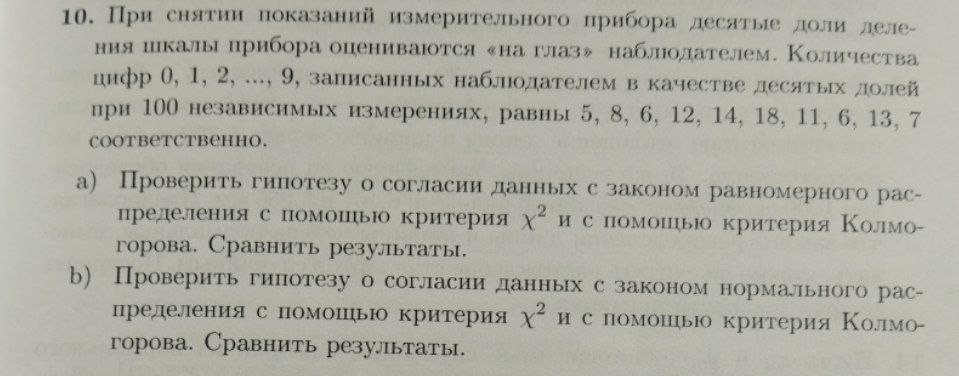

In [1]:
from IPython.display import Image

Image("images/photo_5350494331657645207_y.jpg")

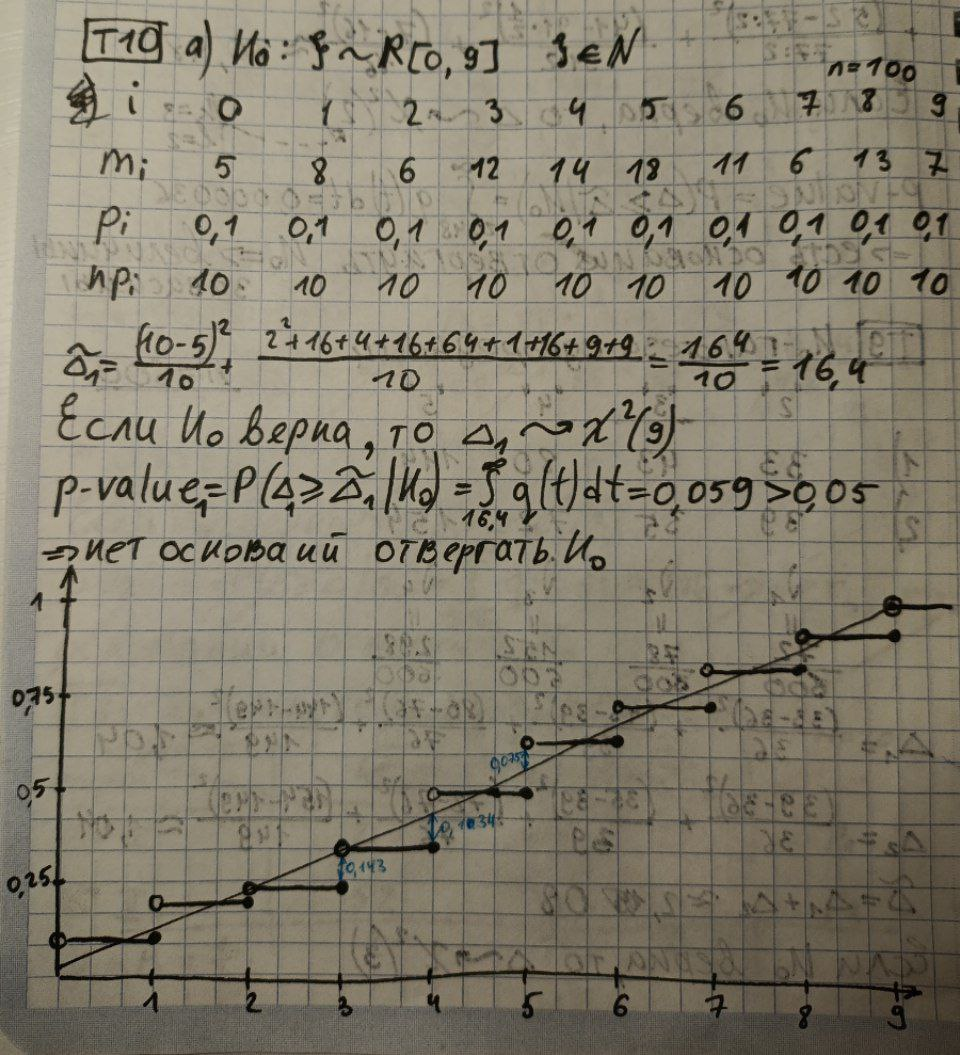

In [5]:
Image("images/photo_5427352127174470327_y.jpg")

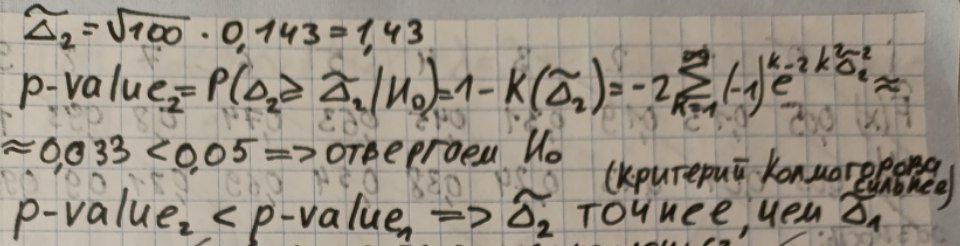

In [4]:
Image("images/photo_5427352127174470326_y.jpg")

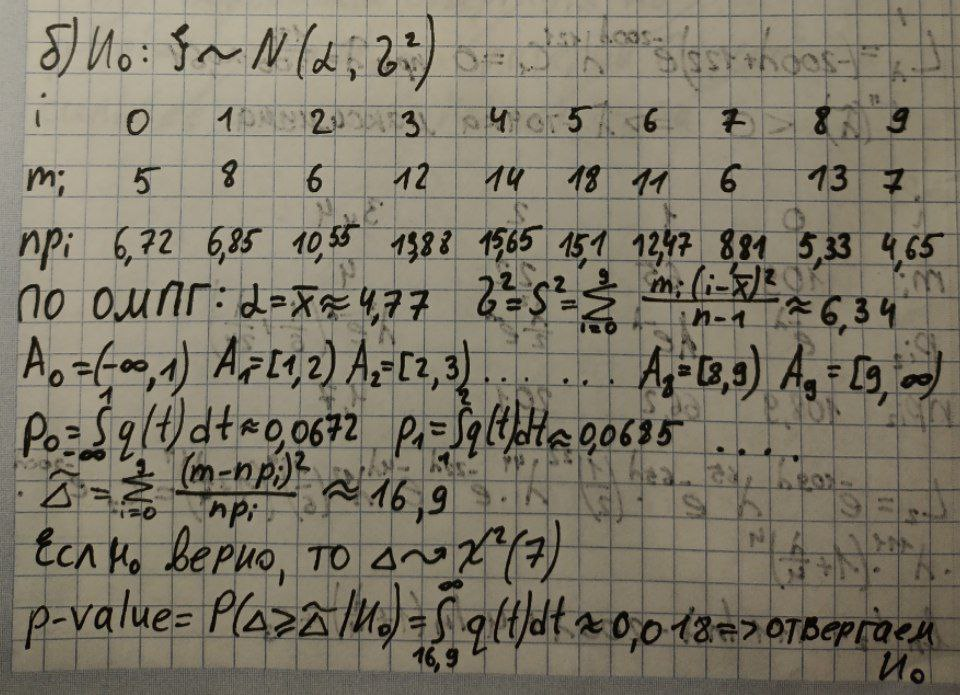

In [9]:
Image("images/photo_5427352127174470321_y.jpg")

In [16]:
import numpy as np
import math

def F(x, alpha, sigma):
    return 0.5 * (1 + math.erf((x - alpha) / (np.sqrt(2 * sigma ** 2))))

n = 100
a = 4.77
s = np.sqrt(6.34)
sample = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7]) / n
F_emp = np.array([sum(sample[:i]) for i in range(len(sample) + 1)])
x = [i for i in range(10)]
our_delta = np.sqrt(n) * np.max([max(abs(F(x[i], a, s) - F_emp[i]), abs(F(x[i], a, s) - F_emp[i + 1])) for i in range(10)])
print('Дельта с волной = ', our_delta)

bst = 50000
bst_delta = []
for i in range(bst):
    sample = sorted(np.random.normal(a, s, n))
    F_emp = [i / n for i in range(0, n + 1)]
    mean = np.mean(sample)
    S = np.std(sample) * n / (n - 1)
    deltas_one_iteration = []
    for i in range(n):
        deltas_one_iteration.append(max(abs(F(sample[i], mean, S) - F_emp[i]), abs(F(sample[i], mean, S) - F_emp[i+1])))
    delta = np.sqrt(n) * np.max(deltas_one_iteration)
    bst_delta.append(delta)

p_value = 0
for i in range(bst):
    if bst_delta[i] >= our_delta:
        p_value += 1
p_value /= bst
print('p_value_2 = ', p_value)
if p_value < 0.05:
    print('Отвергаем гипотезу H0')
else:
    print('Нет оснований отвергнуть гипотезу H0')




Дельта с волной =  1.0021837543059386
p_value_2 =  0.0154
Отвергаем гипотезу H0


Оба критерия показали неверность гипотезы, однако p_value_2 < p_value, полученного с помощью применения критерия Пирсона. Это значит, что критерий Колмагорова оказался сильнее